In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
fashion_mnist

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from 'D:\\Anaconda\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
#This is one image in the training set that needs to be /255 to normalize 
#the pixel values
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

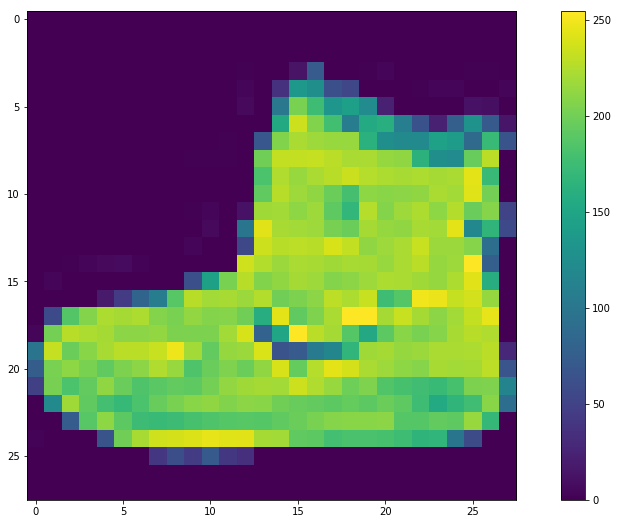

In [6]:
#this is the same image color washed by brightness
plt.figure(figsize=(16,9))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#both test and train need to be scaled accordingly

train_images = train_images/255
test_images = test_images/255

In [8]:
#normalized pixel values are now between 0-1 
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#Add class names for the labels
class_names = ['T-shirt/top','Pants','Pullover','Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

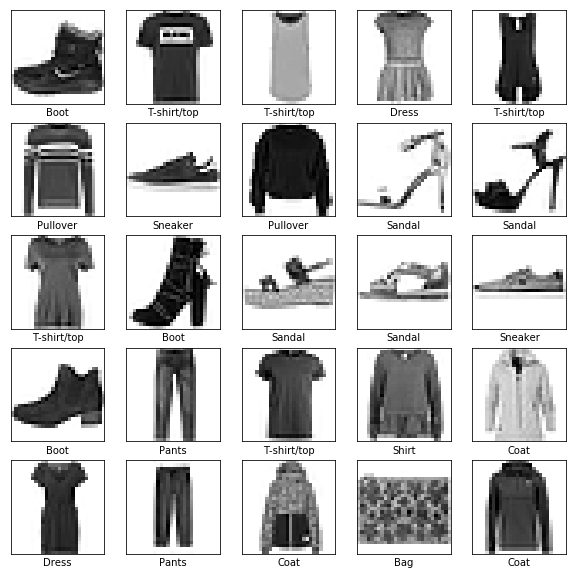

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#there are 60k, 28x28 array images
train_images.shape

(60000, 28, 28)

In [12]:
#There are 60k labels
train_labels.shape

(60000,)

In [13]:
#images are labeled 0-9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#compile the model with correct loss/accuracy method for multi-classification
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
#inspect the model before we run it to make sure it suits our expected specifications
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
#epochs are how many times through the model the data is sent
#batch size is how many images are sent through before updating the weights of the model
model.fit(train_images, train_labels, epochs=50, batch_size=20, verbose=1)

Epoch 1/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4892 - acc: 0.8263
Epoch 2/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3700 - acc: 0.8665
Epoch 3/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3326 - acc: 0.8780
Epoch 4/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3102 - acc: 0.8864
Epoch 5/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2914 - acc: 0.8923
Epoch 6/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2785 - acc: 0.8972
Epoch 7/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2682 - acc: 0.9006
Epoch 8/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2571 - acc: 0.9041
Epoch 9/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2484 - acc: 0.9063
Epoch 10/50
60000/60000 [==============================] - 3s 45us/sample - loss: 

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

10000/10000 [==============================] - 0s 17us/sample - loss: 0.5087 - acc: 0.8865
Test accuracy: 0.8865000009536743


In [18]:
#the model is a little over fit from the training data since the 96% on
#train data versus the 88.38% on test data

In [19]:
#Run the prediction on test images
predictions = model.predict(test_images)
#Grab the first prediction
predictions[0]

array([1.0900515e-18, 5.3217495e-29, 1.8817356e-28, 0.0000000e+00,
       6.2902880e-31, 5.4082081e-09, 2.4295692e-29, 9.8693852e-07,
       8.1685901e-20, 9.9999905e-01], dtype=float32)

In [20]:
#Get the predicted label of the first predicted image
np.argmax(predictions[0])

9

In [21]:
#this matches the ground truth label and is therefore correct
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    """plots the image and the % probability of predicted class plus g.truth Blue correct Red incorrect"""
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    #add label of probability % of class    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
def plot_value_array(i, predictions_array, true_label):
    """Bar graph of labels where Green is Ground truth Red is Predicted % Class"""
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(np.arange(10), class_names, rotation=90)
    #% predicted 
    plt.yticks(np.arange(10))
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    #plt.xlabel(class_names, rotation = 90, ha="right")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

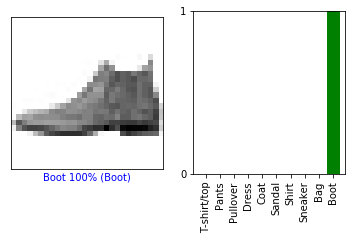

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

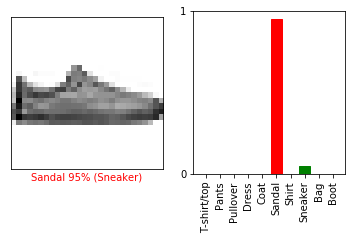

In [24]:
# This is an incorrect prediction of Bag & sandal when g.truth was Sneaker 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

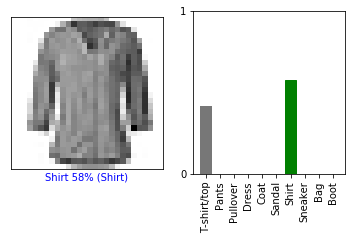

In [25]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

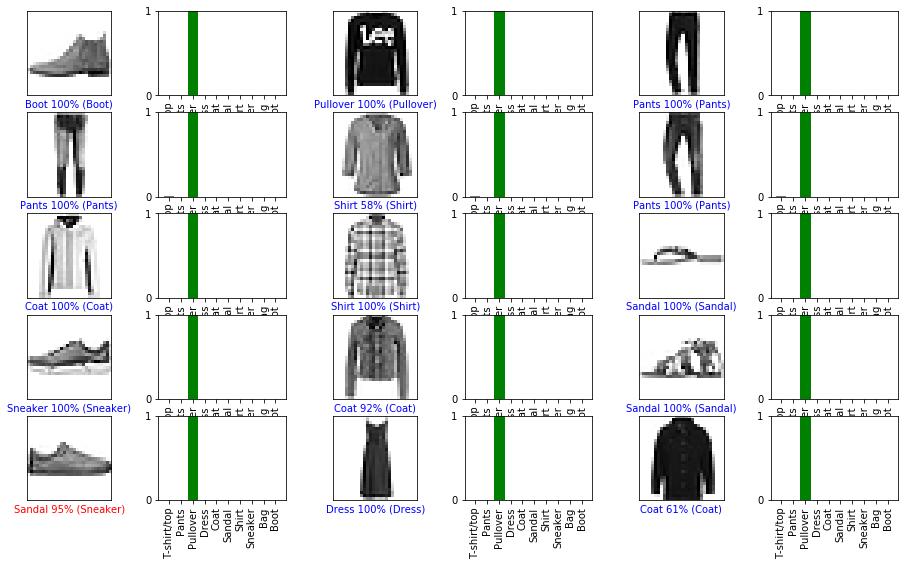

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(16,9))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(1, predictions, test_labels)
plt.show()

In [27]:
#keras is geared towards batch predictions so it is expecting a list of lists
#here is a method to make a single prediction
img = test_images[10]
print(f"Before shape: {img.shape}")
img = (np.expand_dims(img,0))
print(f"After shape: {img.shape}")


Before shape: (28, 28)
After shape: (1, 28, 28)


In [28]:
predict_single = model.predict(img)
print(predict_single)

[[7.95108099e-06 1.11241329e-10 1.75105724e-02 1.36292844e-14
  9.24485564e-01 3.70008579e-10 5.79958707e-02 1.29906532e-25
  3.71120337e-14 4.80301399e-09]]


In [29]:
print(f"Predicted: {np.argmax(predict_single[0])}, Truth: {test_labels[10]}")

Predicted: 4, Truth: 4
